In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
df = pd.read_csv("xclara.csv")

In [3]:
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
f1 = df['V1'].values
f2 = df["V2"].values

In [5]:
X = np.array(list(zip(f1,f2)))

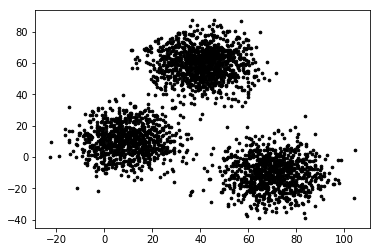

In [6]:
plt.scatter(f1,f2,c="black",s=7)
plt.show()

In [20]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [21]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 1. 45.]
 [66. 25.]
 [61. 66.]]


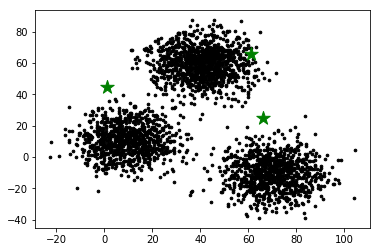

In [22]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [23]:
C.shape

(3, 2)

In [24]:
C_old = np.zeros(C.shape)

In [25]:
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [26]:
clusters = np.zeros(len(X))

In [27]:
clusters

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
error = dist(C,C_old,None)

In [29]:
error

122.81693694275232

In [30]:
while error !=0:
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [36]:
C_old

array([[  9.478045,  10.686052],
       [ 69.92419 , -10.119641],
       [ 40.683628,  59.715893]], dtype=float32)

In [46]:
C

array([[  9.478045,  10.686052],
       [ 69.92419 , -10.119641],
       [ 40.683628,  59.715893]], dtype=float32)

In [37]:
error

0.0

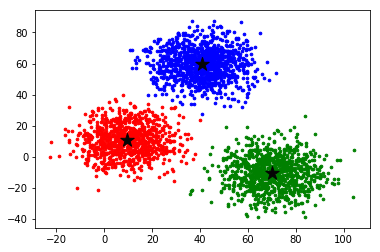

In [45]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')